In [45]:
using Plots

In [46]:
p = 2
n = 8

8

Definisco il vettore dei nodi con dimensione m + 1 con m = p + n + 1

I primi p + 1 elementi devono essere uguali a 0

Gli ultimi p + 1 devono essere uguali a 1

In [47]:
U = [0.0 0 0 1/4 1/4 1/2 1/2 3/4 3/4 1 1 1]

W = [1 sqrt(2)/2 1 sqrt(2)/2 1 sqrt(2)/2 1 sqrt(2)/2 1 sqrt(2)/2]

1×10 Array{Float64,2}:
 1.0  0.707107  1.0  0.707107  1.0  0.707107  1.0  0.707107  1.0  0.707107

Controllo che il vettore sia corretto.

In [48]:
function check_knots(U)
    
    for i=1:p+1
        @assert U[i] == 0.0
    end

    for i=size(U,2):-1:size(U,2) - p
        @assert U[i] == 1.0
    end
    
end

check_knots (generic function with 1 method)

In [49]:
check_knots(U)

Definisco la matrice dei punti di controllo, che deve avere dimensione n + 1.

In [50]:
P = [1.0 1.0 0.0 -1.0 -1 -1 0 1 1 1; 0.0 1.0 1.0 1.0 0 -1 -1 -1 0 1]

2×10 Array{Float64,2}:
 1.0  1.0  0.0  -1.0  -1.0  -1.0   0.0   1.0  1.0  1.0
 0.0  1.0  1.0   1.0   0.0  -1.0  -1.0  -1.0  0.0  1.0

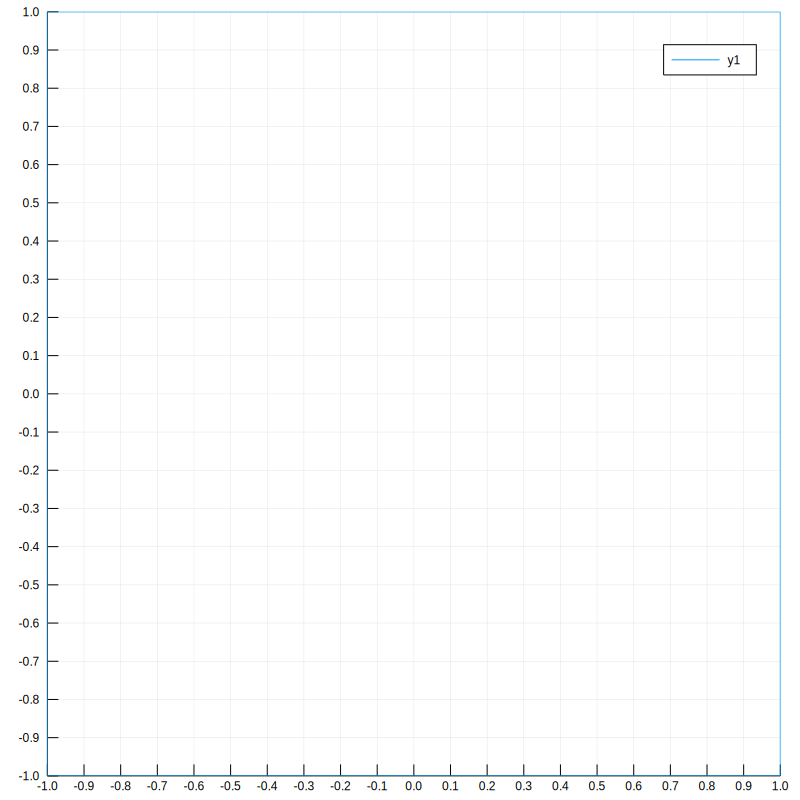

In [51]:
plot(P[1, :], P[2, :], xlims = (-1.0, 1.0), ylims = (-1.0, 1), xticks = -1:0.1:1, yticks = -1:0.1:1, size=(800,800))

Definisco un metodo per trattare l'indicizzazione degli array in Julia a partire da 1

In [52]:
function T(U, i)

	if i+1 <= size(U)[2]
		return U[i+1]
	else
		return 0.0
	end

end

T (generic function with 1 method)

In [53]:
function N(u, U, i, j)

	if j <= 0
		if u >= T(U, i) && u < T(U, i+1)
			return 1.0
		else
			return 0.0
		end
	end

	if  (T(U, i+j+1) - T(U, i+1)) == 0 && (T(U, i+j) - T(U,i)) == 0
		return 0.0
	else

		if (T(U, i+j+1) - T(U, i+1)) == 0
			return ((u - T(U, i)) / (T(U, i+j) - T(U,i))) * N(u, U, i, j-1)
		end

		if  (T(U, i+j) - T(U,i)) == 0
			return ((T(U, i+j+1) - u) / (T(U, i+j+1) - T(U, i+1))) * N(u, U, i+1, j-1)
		end

	end

	return ((u - T(U, i)) / (T(U, i+j) - T(U,i))) * N(u, U, i, j-1) + ((T(U, i+j+1) - u) / (T(U, i+j+1) - T(U, i+1))) * N(u, U, i+1, j-1)

end

N (generic function with 2 methods)

Definisco la funzione che ritorna una base con argomenti:


u -> parametro

U -> vettore dei nodi

i, j -> indici

In [54]:
S = (u, U, n, p) -> sum([N(u, U, i, p) * T(W, i) *P[:, i+1] for i=0:n]) / sum([N(u, U, i, p, false) * T(W, i) for i=0:n])

#41 (generic function with 1 method)

In [55]:
X = [S(u, U, n, p)[1] for u in 0:0.001:1]

Y = [S(u, U, n, p)[2] for u in 0:0.001:1]

1001-element Array{Float64,1}:
   0.0                 
   0.005663444026198422
   0.011339915845029701
   0.01702918511665887 
   0.02273101790439916 
   0.028445176677296513
   0.0341714203137748  
   0.03990950410635737 
   0.04565917976748045 
   0.05142019543641344 
   0.057192295687301005
   0.06297522153834145 
   0.06876871046211548 
   ⋮                   
  -0.06297522153834152 
  -0.05719229568730106 
  -0.05142019543641349 
  -0.045659179767480504
  -0.03990950410635741 
  -0.034171420313774827
  -0.028445176677296534
  -0.022731017904399176
  -0.017029185116658886
  -0.011339915845029708
  -0.005663444026198427
 NaN                   

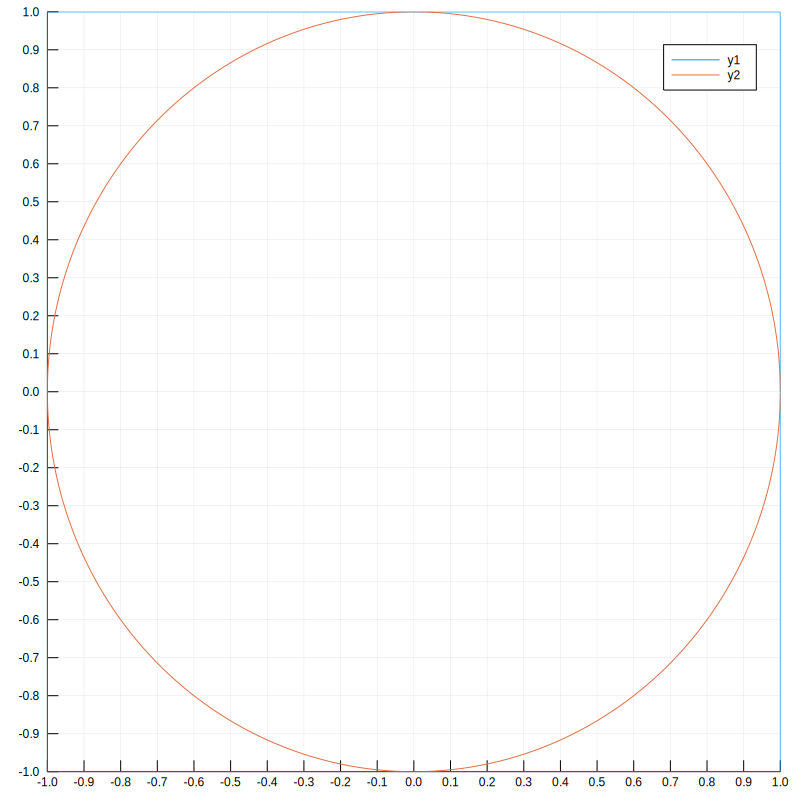

In [56]:
plot([P[1, :], X], [P[2, :], Y], xlims = (-1, 1.0), ylims = (-1, 1), xticks = -1:0.1:1, yticks = -1:0.1:1, size=(800,800))

In [64]:
lista = []

function N(u, U, i, j, add=true)

	if add
		if !((i, j) in lista)
			push!(lista, (i, j))
		end
	end

	if j <= 0
		if u >= T(U, i) && u < T(U, i+1)
			return 1.0
		else
			return 0.0
		end
	end

	if  (T(U, i+j+1) - T(U, i+1)) == 0 && (T(U, i+j) - T(U,i)) == 0
		return 0.0
	else

		if (T(U, i+j+1) - T(U, i+1)) == 0
			return ((u - T(U, i)) / (T(U, i+j) - T(U,i))) * N(u, U, i, j-1, add)
		end

		if  (T(U, i+j) - T(U,i)) == 0
			return ((T(U, i+j+1) - u) / (T(U, i+j+1) - T(U, i+1))) * N(u, U, i+1, j-1, add)
		end

	end

	return ((u - T(U, i)) / (T(U, i+j) - T(U,i))) * N(u, U, i, j-1, add) + ((T(U, i+j+1) - u) / (T(U, i+j+1) - T(U, i+1))) * N(u, U, i+1, j-1, add)

end

N (generic function with 2 methods)

In [65]:
test = S(0.5, U, n, p)

2-element Array{Float64,1}:
 -1.0
  0.0

In [66]:
curves_Xs = [ 0:0.001:1 ] 
curves_Ys = [[ N(u, U, i, j, false) for u=0:0.001:1 ] for (i,j) in lista] 

21-element Array{Array{Float64,1},1}:
 [1.0, 0.992016, 0.984064, 0.976144, 0.968256, 0.9604, 0.952576, 0.944784, 0.937024, 0.929296  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]          
 [1.0, 0.996, 0.992, 0.988, 0.984, 0.98, 0.976, 0.972, 0.968, 0.964  …  -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0]                          
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]                                                     
 [0.0, 0.007968, 0.015872, 0.023712, 0.031488, 0.0392, 0.046848, 0.054432, 0.061952, 0.069408  …  -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0]
 [0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024, 0.028, 0.032, 0.036  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]                                    
 [0.0, 1.6e-5, 6.4e-5, 0.000144, 0.000256, 0.0004, 0.000576, 0.000784, 0.001024, 0.001296  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]              
 [0.0, 0.0, 0.

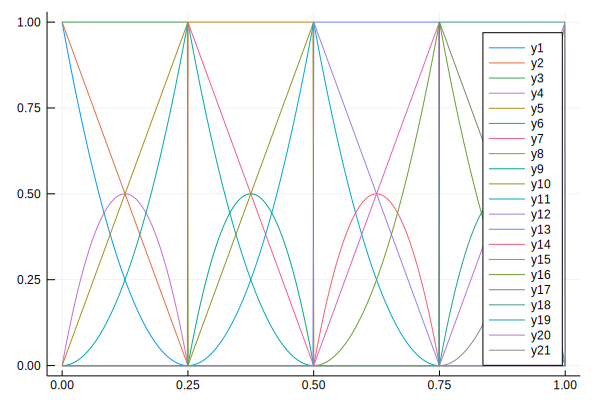

In [67]:
plot(curves_Xs, curves_Ys)